In [1]:
from sklearn.datasets import load_wine

In [2]:
wine=load_wine()

In [3]:
X = wine.data[: , :2]
y = wine.target

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_rest, y_train, y_rest= train_test_split(X, y, test_size=0.5)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_rest , y_rest , test_size=0.6)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train , y_train)

y_test_pred=knn.predict(X_test)
accuracy = sum(y_test_pred == y_test)/len(y_test)

In [9]:
print("Predictions:",y_test_pred)
print("Real value:",y_test)

Predictions: [2 0 1 0 1 0 0 0 0 0 2 0 1 0 2 0 0 0 2 0 0 2 0 2 1 1 0 2 2 0 1 2 1 1 0 1 1
 1 1 2 2 0 0 2 2 2 1 1 1 0 1 0 0 1]
Real value: [2 0 1 2 1 0 2 0 0 0 2 2 1 0 1 0 0 0 2 0 0 1 0 2 1 2 2 2 0 0 2 1 1 1 0 1 2
 1 1 2 2 0 1 1 2 2 1 1 1 0 1 0 1 1]


In [10]:
accuracy

0.7407407407407407

In [11]:
y_test_pred == y_test

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True])

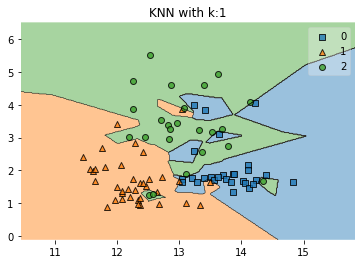

k: 1 Accuracy 0.7142857142857143


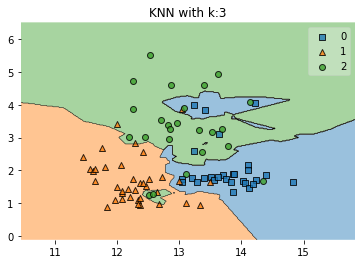

k: 3 Accuracy 0.7714285714285715


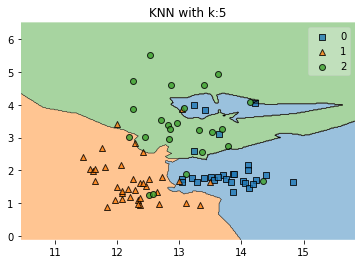

k: 5 Accuracy 0.7142857142857143


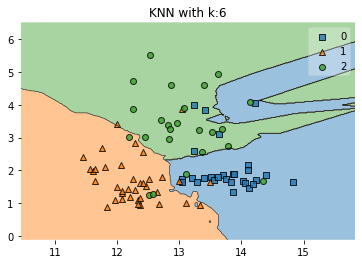

k: 6 Accuracy 0.7142857142857143


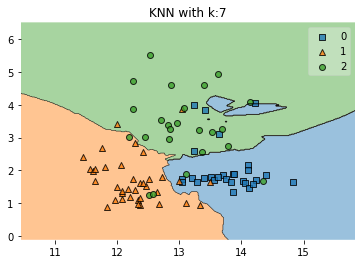

k: 7 Accuracy 0.7714285714285715


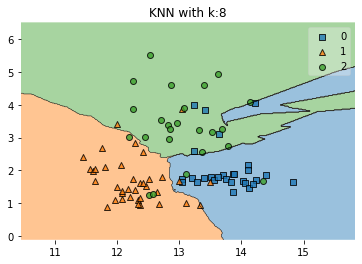

k: 8 Accuracy 0.7428571428571429


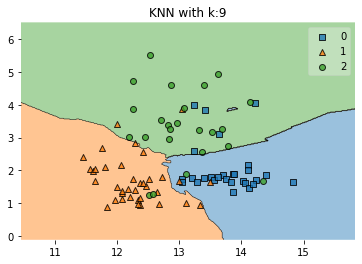

k: 9 Accuracy 0.7142857142857143


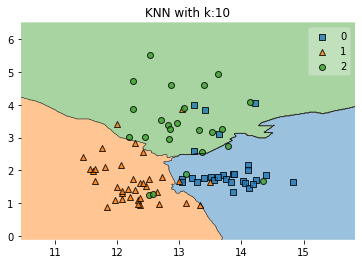

k: 10 Accuracy 0.6857142857142857


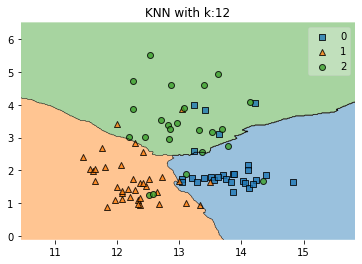

k: 12 Accuracy 0.6857142857142857


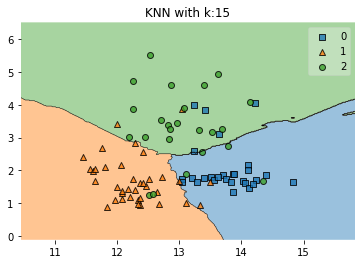

k: 15 Accuracy 0.6857142857142857


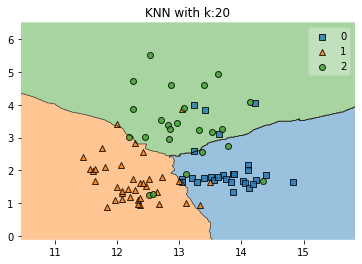

k: 20 Accuracy 0.6857142857142857


In [12]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ks=[1,3,5,6,7,8,9,10,12,15,20]

val_accrucies=[]

best_k = -1

best_accuracy = 0

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    
    fig = plot_decision_regions(X_train, y_train, clf=knn)
    plt.title(f"KNN with k:{k}")
    plt.show()
    
    y_pred = knn.predict(X_val)
    
    accuracy = sum(y_pred==y_val)/len(y_val)
    
    val_accrucies.append(accuracy)
    
    if accuracy>best_accuracy:
        best_k = k
        best_accuracy = accuracy
    
    print('k:', k , 'Accuracy', accuracy)

In [13]:
print('best k:', best_k)
print('best accuracy:', best_accuracy)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)
accuracy = sum(y_test_pred==y_test)/len(y_test)

print('Test accuracy:', accuracy)

best k: 3
best accuracy: 0.7714285714285715
Test accuracy: 0.7037037037037037


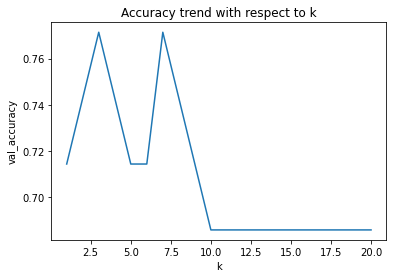

In [14]:
plt.figure()
plt.xlabel('k')
plt.ylabel('val_accuracy')
plt.plot(ks, val_accrucies)
plt.title('Accuracy trend with respect to k')
plt.show()

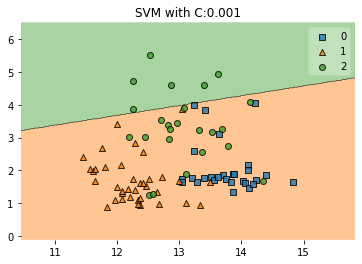

C: 0.001 Accuracy: 0.4


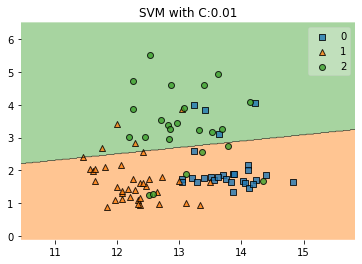

C: 0.01 Accuracy: 0.4


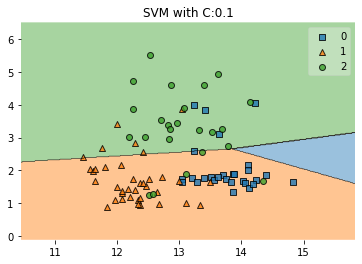

C: 0.1 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


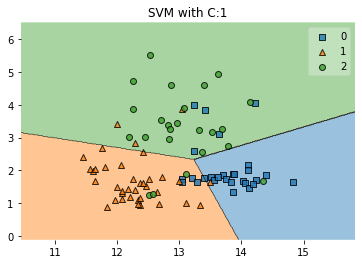

C: 1 Accuracy: 0.6857142857142857


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


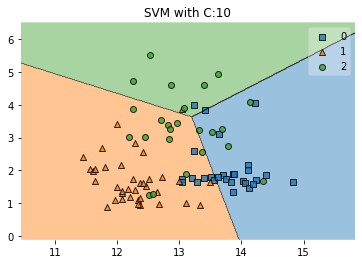

C: 10 Accuracy: 0.6571428571428571


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


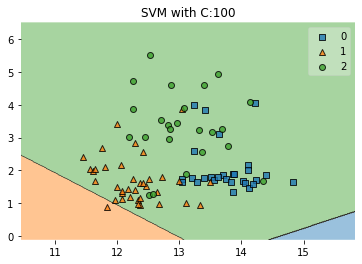

C: 100 Accuracy: 0.2857142857142857


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


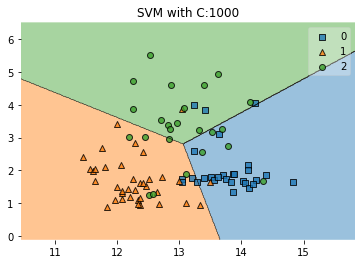

C: 1000 Accuracy: 0.6857142857142857


In [15]:
from sklearn.svm import LinearSVC

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
val_accrucies = []
best_accuracy = 0
best_C = -1

for C in Cs:
    svm = LinearSVC(C=C)
    svm.fit(X_train, y_train)
    
    fig = plot_decision_regions(X_train, y_train, clf=svm)
    plt.title(f"SVM with C:{C}")
    plt.show()
    
    y_pred = svm.predict(X_val)
    accuracy = sum(y_pred == y_val)/len(y_val)
    
    val_accrucies.append(accuracy)
    
    if accuracy>best_accuracy:
        best_C = C
        best_accuracy = accuracy
        
    print('C:', C, 'Accuracy:', accuracy)

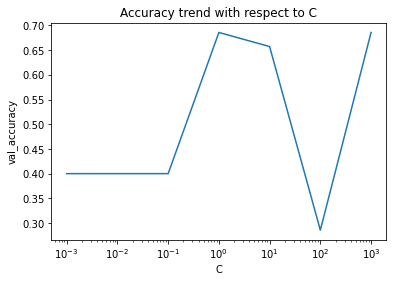

In [16]:
plt.figure()
plt.xlabel('C')
plt.ylabel('val_accuracy')
plt.plot(Cs, val_accrucies)
plt.title('Accuracy trend with respect to C')
plt.xscale('log')
plt.show()

In [17]:
svm = LinearSVC(C=best_C)
print('best C:', best_C)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = sum(y_pred == y_test)/len(y_test)
print('Test accuracy:', accuracy)

best C: 1
Test accuracy: 0.7592592592592593


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


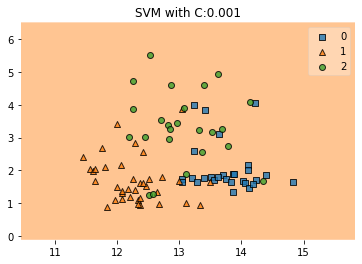

C: 0.001 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


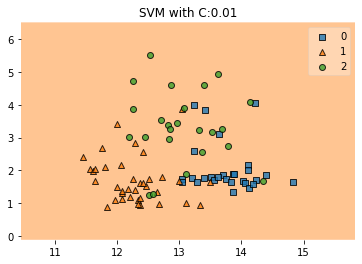

C: 0.01 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


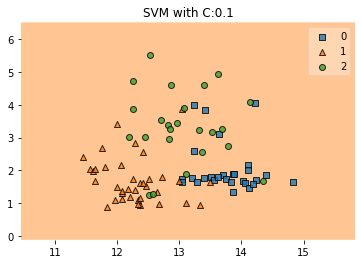

C: 0.1 Accuracy: 0.4


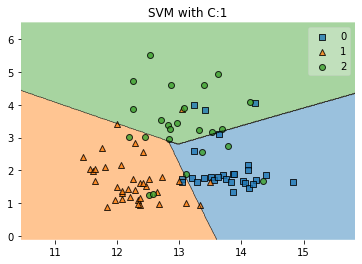

C: 1 Accuracy: 0.6571428571428571


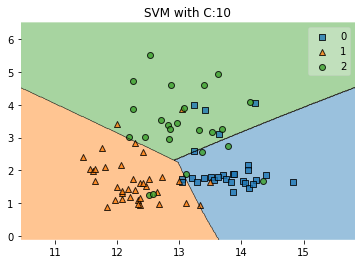

C: 10 Accuracy: 0.6571428571428571


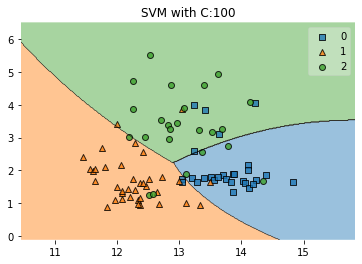

C: 100 Accuracy: 0.6571428571428571


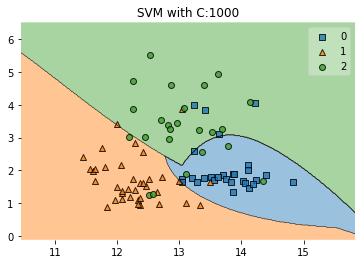

C: 1000 Accuracy: 0.6857142857142857


In [18]:
from sklearn.svm import SVC

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
val_accrucies = []
best_accuracy = 0
best_C = -1

for C in Cs:
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_train, y_train)
    
    fig = plot_decision_regions(X_train, y_train, clf=svm)
    plt.title(f"SVM with C:{C}")
    plt.show()
    
    y_pred = svm.predict(X_val)
    accuracy = sum(y_pred == y_val)/len(y_val)
    
    val_accrucies.append(accuracy)
    
    if accuracy>best_accuracy:
        best_C = C
        best_accuracy = accuracy
        
    print('C:', C, 'Accuracy:', accuracy)

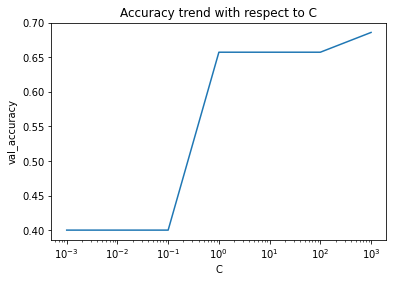

In [19]:
plt.figure()
plt.xlabel('C')
plt.ylabel('val_accuracy')
plt.plot(Cs, val_accrucies)
plt.title('Accuracy trend with respect to C')
plt.xscale('log')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


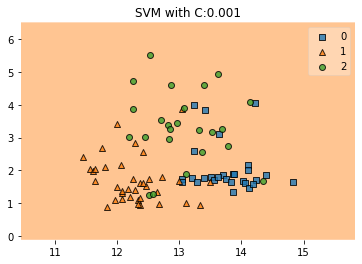

C: 0.001 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


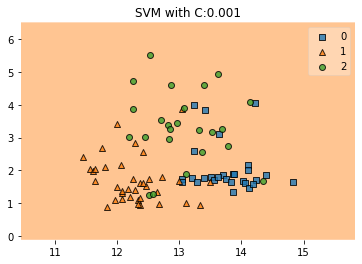

C: 0.001 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


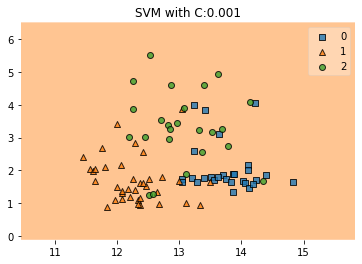

C: 0.001 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


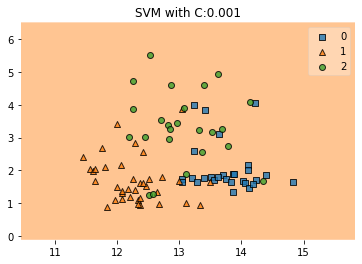

C: 0.001 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


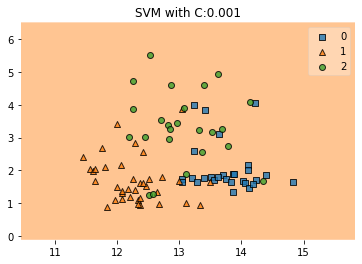

C: 0.001 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


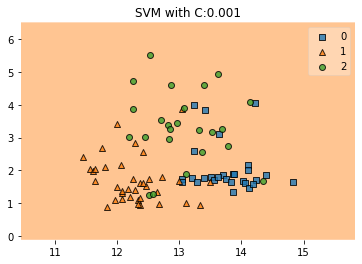

C: 0.001 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


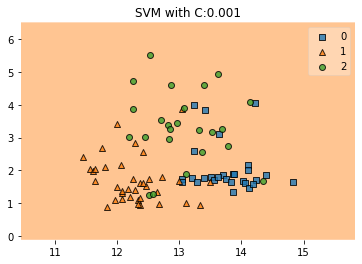

C: 0.001 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


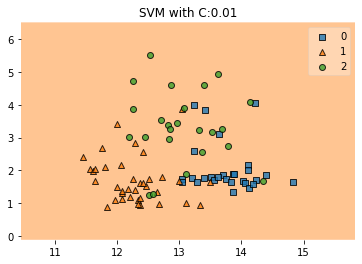

C: 0.01 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


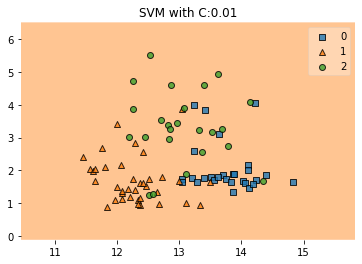

C: 0.01 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


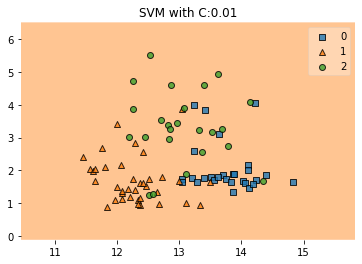

C: 0.01 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


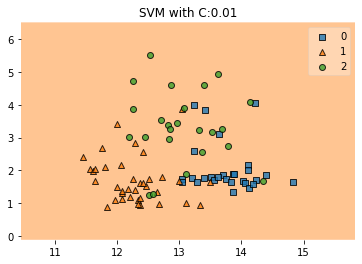

C: 0.01 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


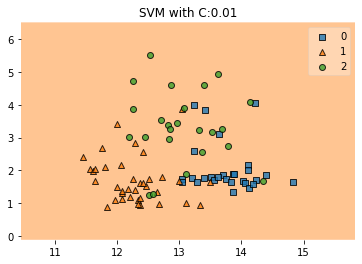

C: 0.01 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


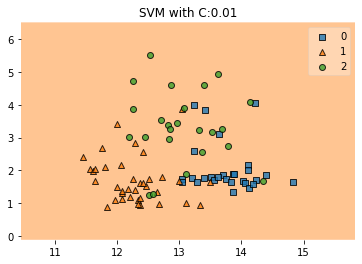

C: 0.01 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


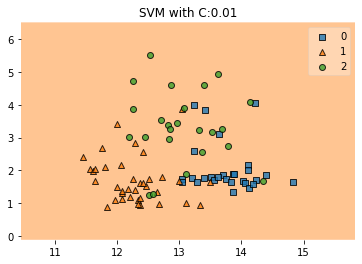

C: 0.01 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


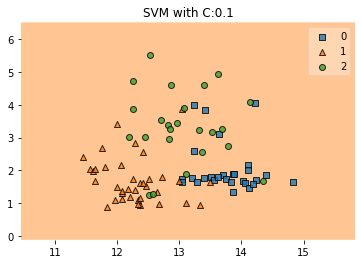

C: 0.1 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


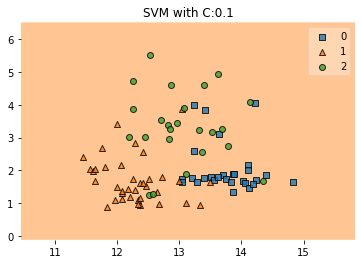

C: 0.1 Accuracy: 0.4


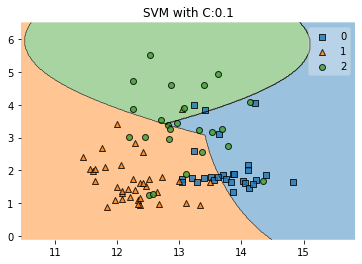

C: 0.1 Accuracy: 0.5428571428571428


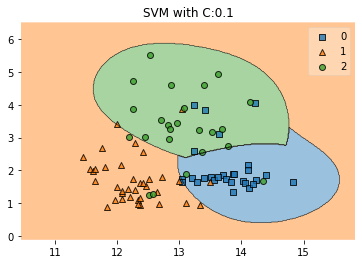

C: 0.1 Accuracy: 0.6857142857142857


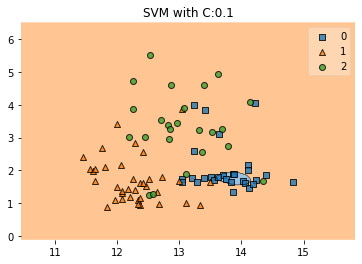

C: 0.1 Accuracy: 0.45714285714285713


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


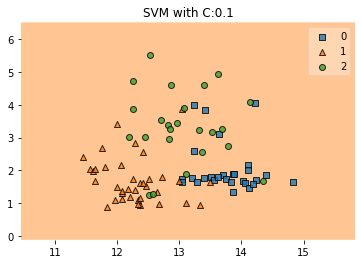

C: 0.1 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


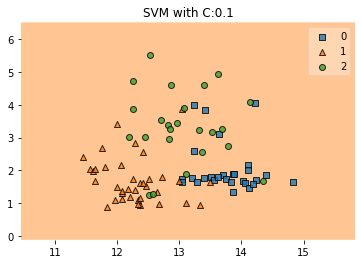

C: 0.1 Accuracy: 0.4


C:\Users\Lenovo\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


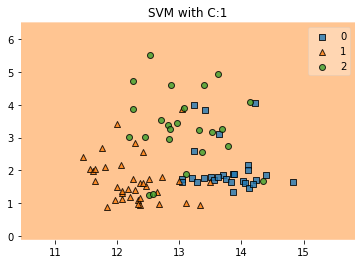

C: 1 Accuracy: 0.4


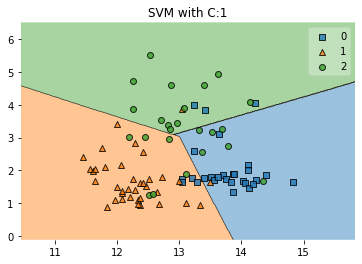

C: 1 Accuracy: 0.6285714285714286


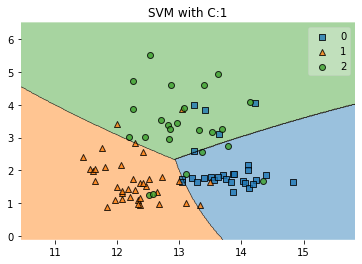

C: 1 Accuracy: 0.6571428571428571


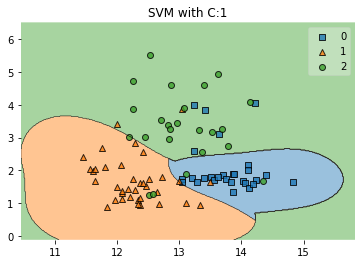

C: 1 Accuracy: 0.7142857142857143


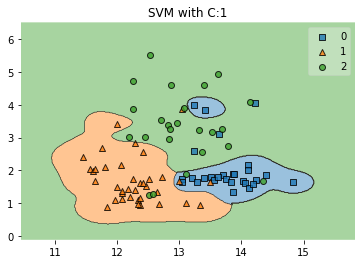

C: 1 Accuracy: 0.7142857142857143


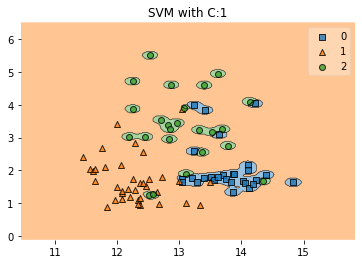

C: 1 Accuracy: 0.6571428571428571


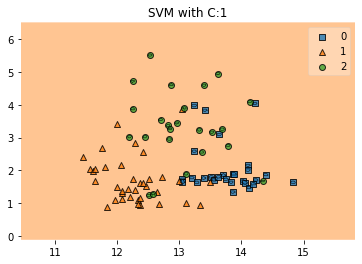

C: 1 Accuracy: 0.4857142857142857


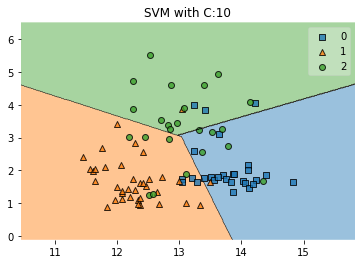

C: 10 Accuracy: 0.6285714285714286


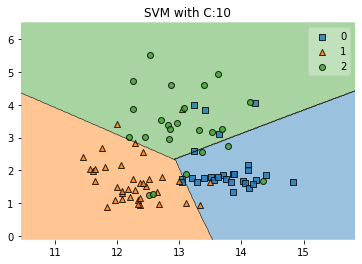

C: 10 Accuracy: 0.6571428571428571


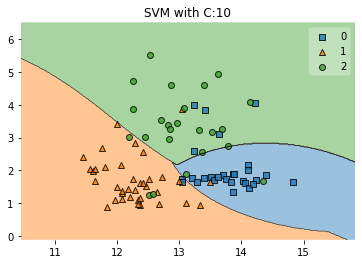

C: 10 Accuracy: 0.6571428571428571


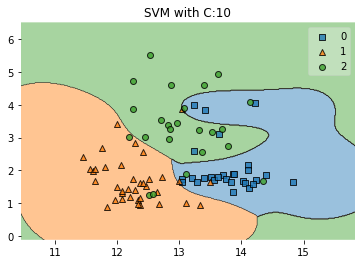

C: 10 Accuracy: 0.7142857142857143


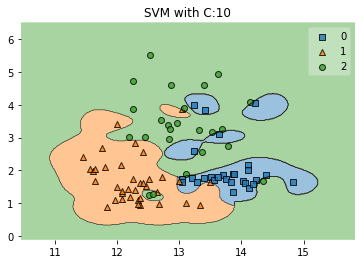

C: 10 Accuracy: 0.7428571428571429


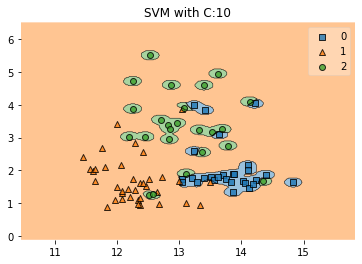

C: 10 Accuracy: 0.6857142857142857


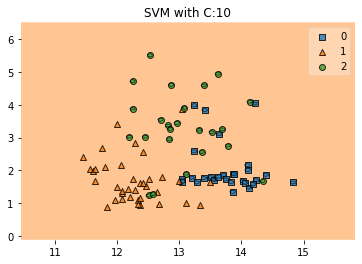

C: 10 Accuracy: 0.5428571428571428


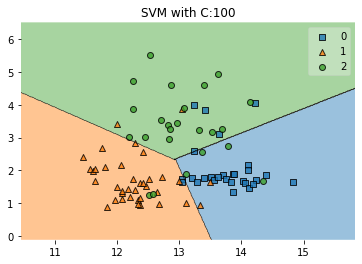

C: 100 Accuracy: 0.6571428571428571


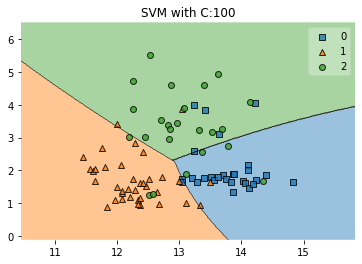

C: 100 Accuracy: 0.6857142857142857


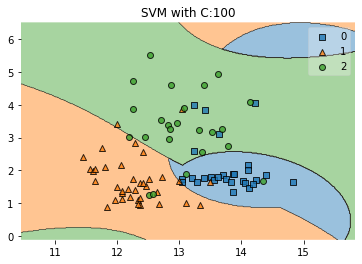

C: 100 Accuracy: 0.7142857142857143


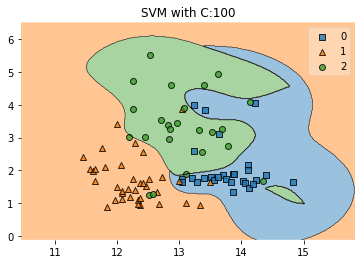

C: 100 Accuracy: 0.7714285714285715


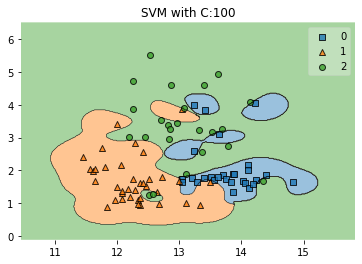

C: 100 Accuracy: 0.7142857142857143


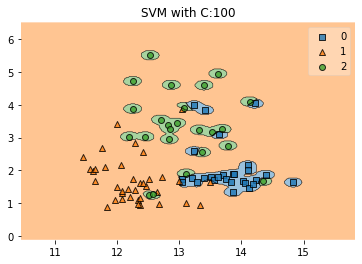

C: 100 Accuracy: 0.6857142857142857


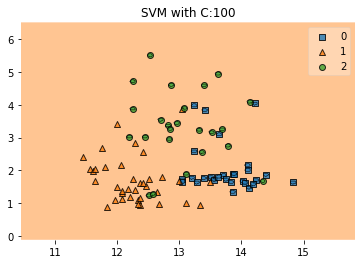

C: 100 Accuracy: 0.5428571428571428


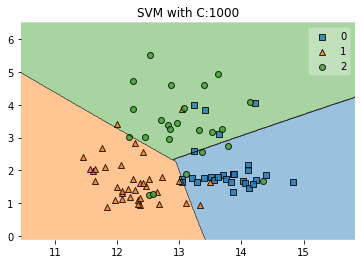

C: 1000 Accuracy: 0.6857142857142857


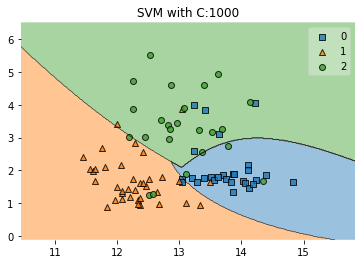

C: 1000 Accuracy: 0.6571428571428571


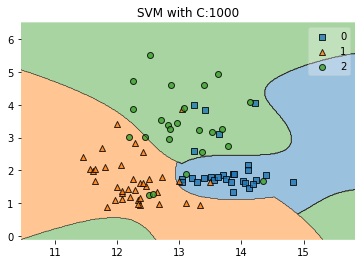

C: 1000 Accuracy: 0.7142857142857143


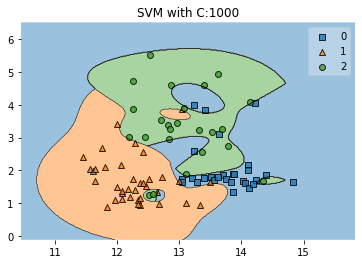

C: 1000 Accuracy: 0.6857142857142857


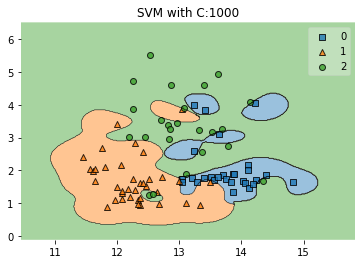

C: 1000 Accuracy: 0.7142857142857143


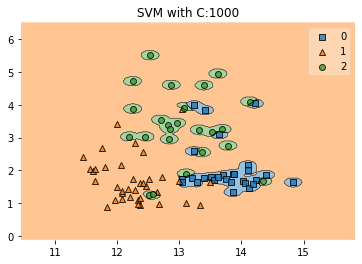

C: 1000 Accuracy: 0.6857142857142857


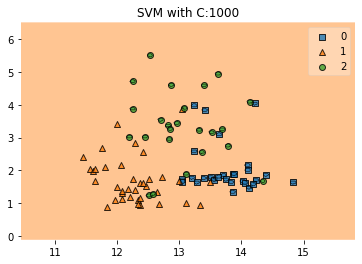

C: 1000 Accuracy: 0.5428571428571428


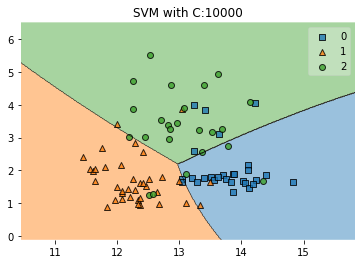

C: 10000 Accuracy: 0.6571428571428571


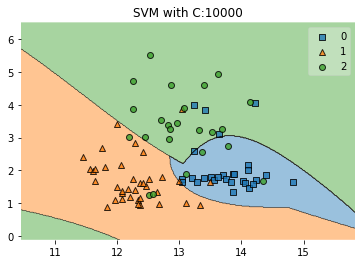

C: 10000 Accuracy: 0.6857142857142857


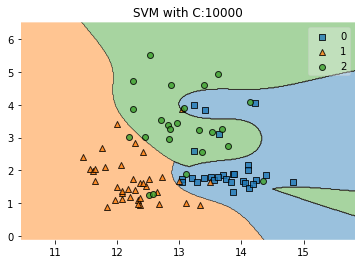

C: 10000 Accuracy: 0.7428571428571429


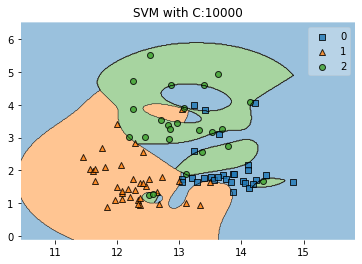

C: 10000 Accuracy: 0.6571428571428571


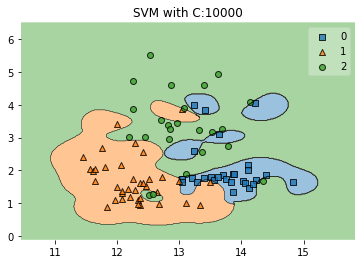

C: 10000 Accuracy: 0.7142857142857143


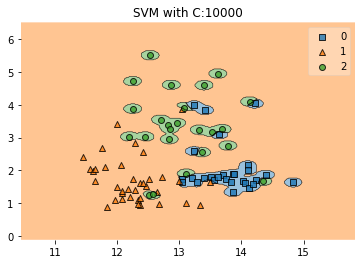

C: 10000 Accuracy: 0.6857142857142857


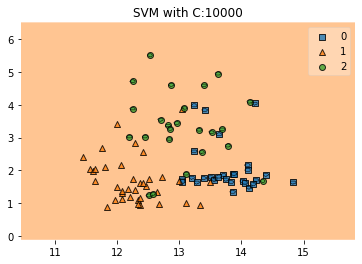

C: 10000 Accuracy: 0.5428571428571428


In [20]:
from sklearn.svm import SVC

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
gammas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
val_accrucies = []
best_accuracy = 0
best_C = -1
best_gamma = -1

for C in Cs:
    for gamma in gammas:
        svm = SVC(kernel='rbf', C=C, gamma=gamma)
        svm.fit(X_train, y_train)

        fig = plot_decision_regions(X_train, y_train, clf=svm)
        plt.title(f"SVM with C:{C}")
        plt.show()

        y_pred = svm.predict(X_val)
        accuracy = sum(y_pred == y_val)/len(y_val)

        val_accrucies.append(accuracy)

        if accuracy>best_accuracy:
            best_C = C
            best_gamma = gamma
            best_accuracy = accuracy

        print('C:', C, 'Accuracy:', accuracy)

In [21]:
print('Best C:', best_C)
print('Best gamma:', best_gamma)

Best C: 100
Best gamma: 1


In [22]:
svm = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = sum(y_pred == y_test)/len(y_test)
print('Test accuracy:', accuracy)

Test accuracy: 0.7222222222222222


In [ ]:
#1 KNN
#2 RBF SVM
#3 Linear SVM